In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pathMain = "/content/drive/MyDrive/Datasets/AudioWAV/"
dir_list = os.listdir(pathMain)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [ ]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list:
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(pathMain + i)

df = pd.DataFrame(emotion, columns=['labels'])
df['source'] = 'CREMA-D'
df = pd.concat([df, pd.DataFrame(path, columns=['path'])], axis=1)
df.head()

,labels,source,path
0,male_angry,CREMA-D,/content/drive/MyDrive/Datasets/AudioWAV/1001_...
1,male_disgust,CREMA-D,/content/drive/MyDrive/Datasets/AudioWAV/1001_...
2,male_fear,CREMA-D,/content/drive/MyDrive/Datasets/AudioWAV/1001_...
3,male_happy,CREMA-D,/content/drive/MyDrive/Datasets/AudioWAV/1001_...
4,male_neutral,CREMA-D,/content/drive/MyDrive/Datasets/AudioWAV/1001_...


In [ ]:
df['labels'].value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  7442 non-null   object
 1   source  7442 non-null   object
 2   path    7442 non-null   object
dtypes: object(3)
memory usage: 174.5+ KB


In [ ]:
def plot_random():
  f = plt.figure()
  f.set_figwidth(8)
  f.set_figheight(16)
  idx = np.random.randint(0, len(df))
  data, sr = librosa.load(df['path'][idx], sr=44100)
  emotion = df['labels'][idx]
  plt.subplot(4, 1, 1)
  plt.title(f'Sound wave of- {emotion}')
  librosa.display.waveshow(data, sr=sr)
  plt.subplot(4, 1, 2)
  plt.title('Time v/s Frequency')
  D = np.abs(librosa.stft(data))
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
  plt.colorbar()
  plt.subplot(4, 1, 3)
  plt.title('log-scaled')
  DB = librosa.amplitude_to_db(D, ref=np.max)
  librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log');
  plt.colorbar(format='%+2.0f db')
  plt.subplot(4, 1, 4)
  plt.magnitude_spectrum(data, scale='dB')
  plt.show()

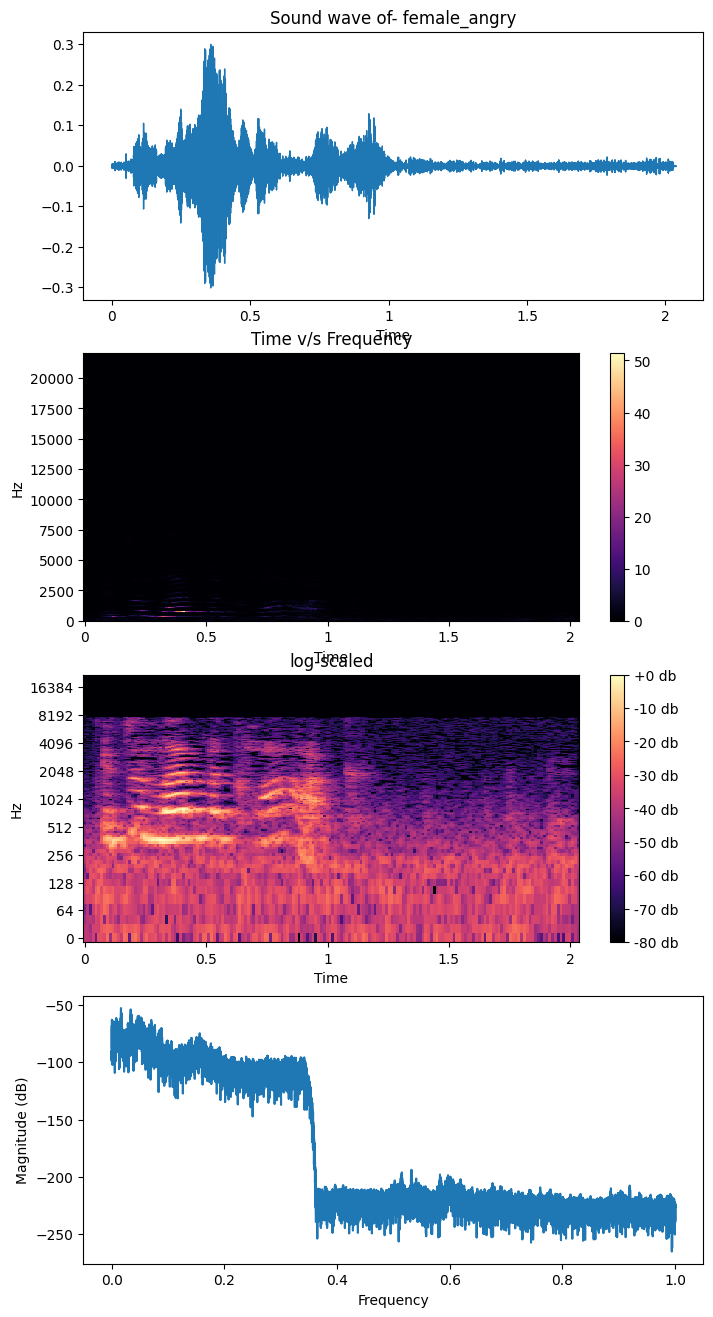

In [ ]:
plot_random()

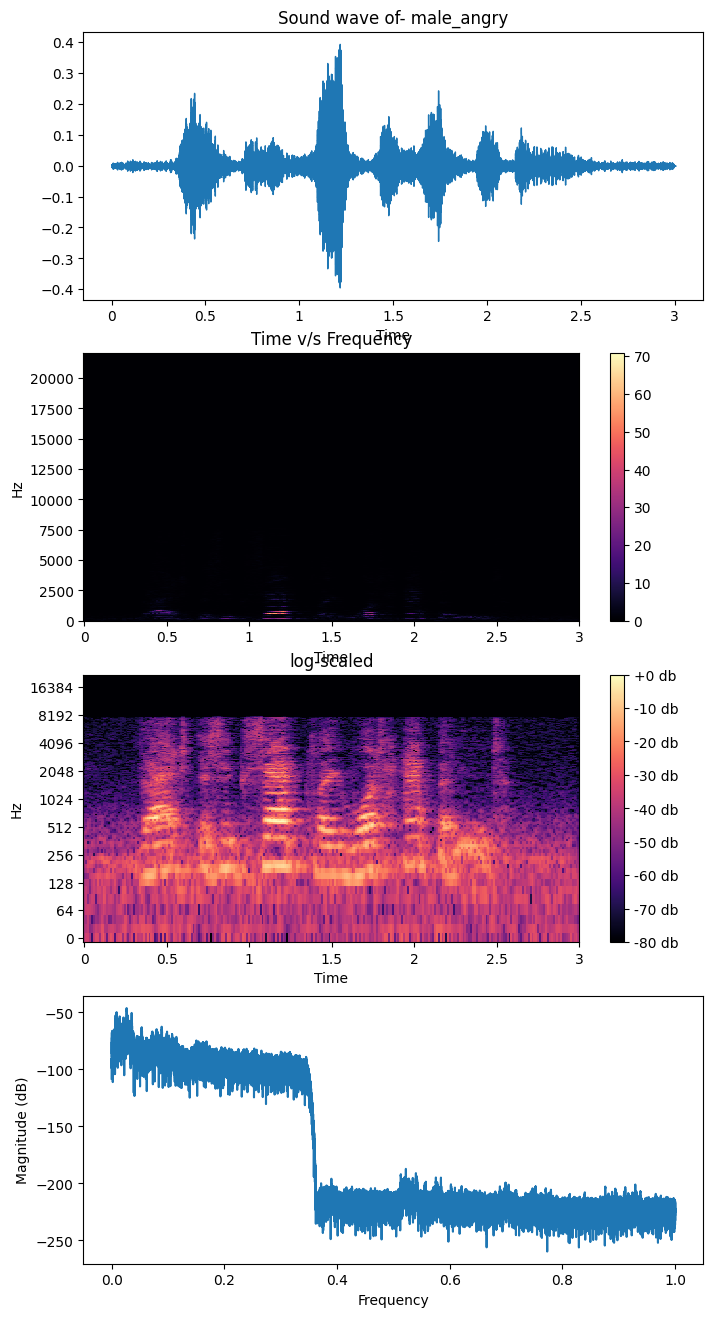

In [ ]:
plot_random()

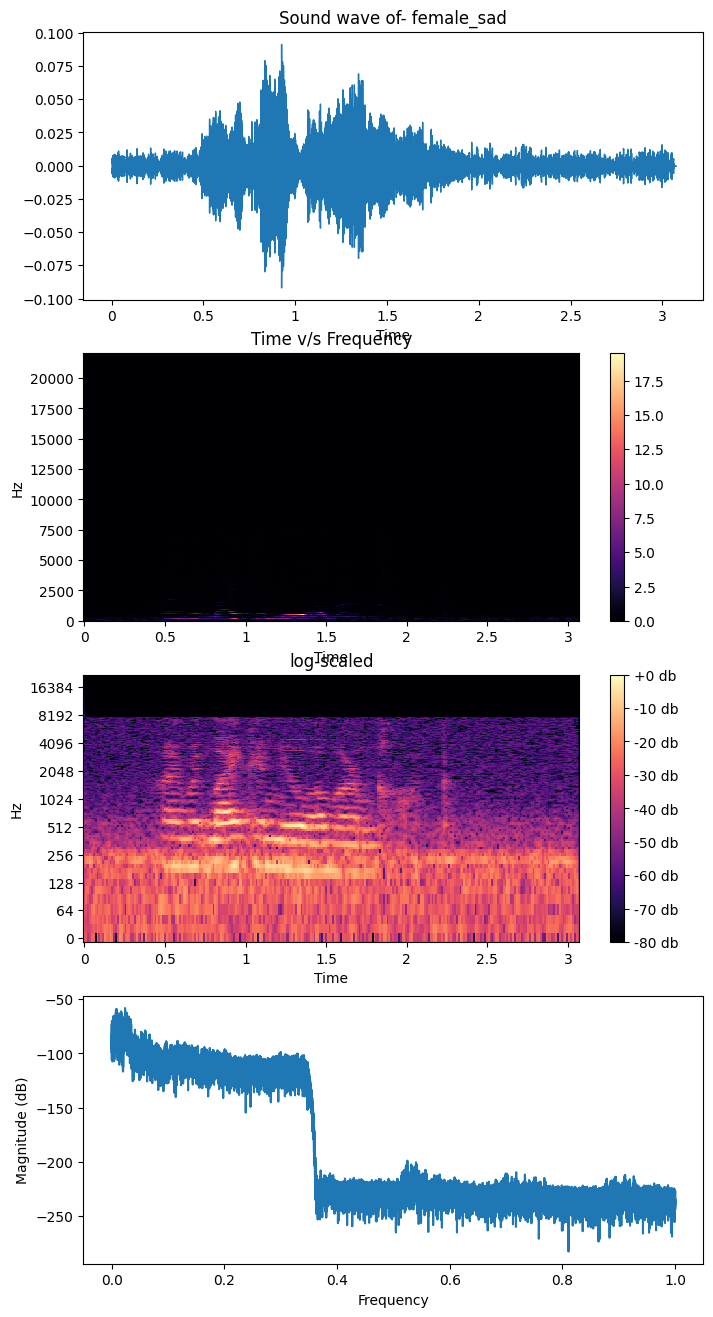

In [ ]:
plot_random()

In [ ]:
def feature_extract(i):
  audio, sr = librosa.load(df.path[i], sr=44000)
  y = df.labels[i]
  mfcc = librosa.feature.mfcc(y = audio, sr=44000, n_mfcc=20)
  mfcc = mfcc.T
  return audio, y, mfcc

In [ ]:
from multiprocessing import Pool
from tqdm import tqdm
with Pool() as p:
  results = list(tqdm(p.imap(feature_extract, range(df.shape[0])), total=df.shape[0]))

X, y, mfccs = zip(*results)


100%|██████████| 7442/7442 [07:25<00:00, 16.70it/s]


In [ ]:
def plot_random_mfccs():
  idx = np.random.randint(0, len(X))
  librosa.display.specshow(mfccs[idx], x_axis='time')
  plt.title(f'MFCCs of {y[idx]}')
  plt.colorbar()
  plt.tight_layout()
  plt.show()

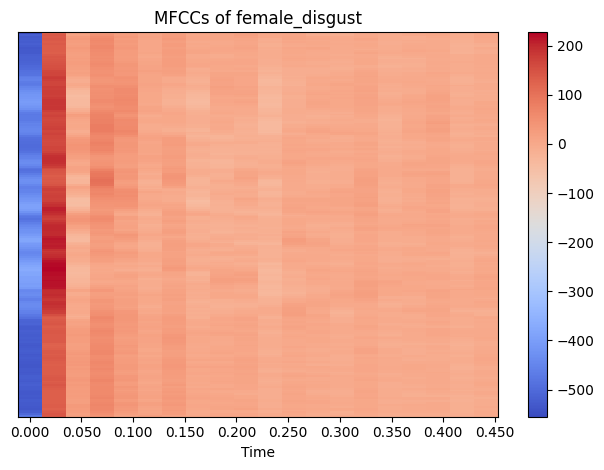

In [ ]:
plot_random_mfccs()

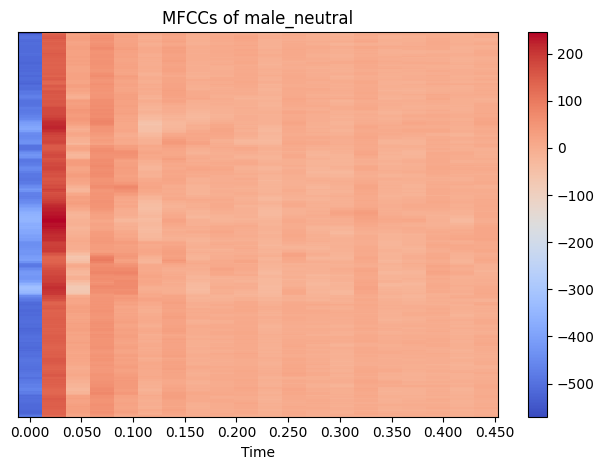

In [ ]:
plot_random_mfccs()

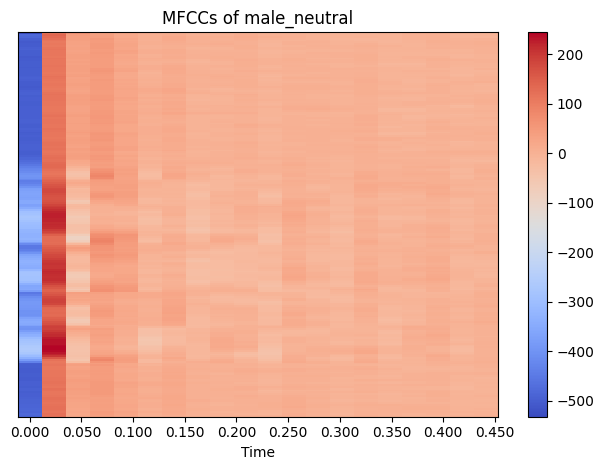

In [ ]:
plot_random_mfccs()

In [ ]:
def label_encode(y):
  if y == 'male_angry':
    return 0
  if y == 'male_disgust':
    return 1
  if y == 'male_fear':
    return 2
  if y == 'male_happy':
    return 3
  if y == 'male_sad':
    return 4
  if y == 'female_angry':
    return 5
  if y == 'female_disgust':
    return 6
  if y == 'female_fear':
    return 7
  if y == 'female_happy':
    return 8
  if y == 'female_sad':
    return 9
  if y == 'male_neutral':
    return 10
  if y == 'female_neutral':
    return 11

In [ ]:
y = np.array(y)
y_label = np.array(list(map(label_encode, y)))

In [ ]:
y_label

array([ 0,  1,  2, ...,  8, 11,  9])

In [ ]:
y

array(['male_angry', 'male_disgust', 'male_fear', ..., 'female_happy',
       'female_neutral', 'female_sad'], dtype='<U14')

In [ ]:
mfccs[0].shape

(196, 20)

In [ ]:
mfccs[1].shape

(201, 20)

In [ ]:
mfccs[123].shape

(267, 20)

In [ ]:
maxlen = max([len(f) for f in mfccs])
mfccs_padded = tf.keras.preprocessing.sequence.pad_sequences(mfccs, padding='post', dtype='float32', maxlen=maxlen)
mfccs_padded.shape


(7442, 431, 20)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mfccs_padded, y_label, test_size=0.25, random_state=0)

In [ ]:

X_train.shape, y_train.shape

((5581, 431, 20), (5581,))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, 5,padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(4)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(12))
model.add(layers.Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 431, 256)          25856     
                                                                 
 activation (Activation)     (None, 431, 256)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 53, 256)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 53, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 53, 128)           163968    
                                                                 
 activation_1 (Activation)   (None, 53, 128)           0         
                                                        

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,batch_size=10, epochs=50)

Epoch 1/50
186/559 [========>.....................] - ETA: 27s - loss: 11.7238 - accuracy: 0.1005

KeyboardInterrupt: ignored

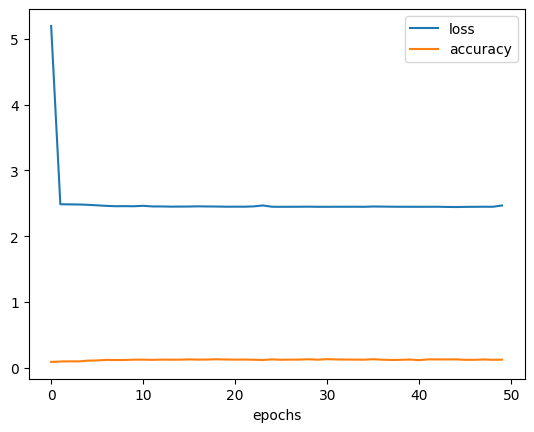

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

59/59 [==============================] - 2s 35ms/step - loss: 2.4536 - accuracy: 0.1155


[2.4535746574401855, 0.11552928388118744]

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model1 = Sequential()
model1.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling1D(pool_size=(8)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv1D(128, 5,padding='same'))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling1D(pool_size=(4)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Conv1D(64, 5,padding='same'))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling1D(pool_size=(4)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(12))
model1.add(layers.Activation('softmax'))

model1.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model1.fit(X_train, y_train,batch_size=10, epochs=50)

Epoch 1/50
559/559 [==============================] - 34s 58ms/step - loss: 4.3200 - accuracy: 0.1147
Epoch 2/50
559/559 [==============================] - 34s 60ms/step - loss: 2.2870 - accuracy: 0.1765
Epoch 3/50
559/559 [==============================] - 30s 53ms/step - loss: 2.2226 - accuracy: 0.2007
Epoch 4/50
559/559 [==============================] - 33s 60ms/step - loss: 2.0563 - accuracy: 0.2505
Epoch 5/50
559/559 [==============================] - 33s 59ms/step - loss: 1.8906 - accuracy: 0.2942
Epoch 6/50
559/559 [==============================] - 30s 53ms/step - loss: 1.7981 - accuracy: 0.3114
Epoch 7/50
559/559 [==============================] - 33s 60ms/step - loss: 1.7843 - accuracy: 0.3304
Epoch 8/50
559/559 [==============================] - 31s 56ms/step - loss: 1.7351 - accuracy: 0.3433
Epoch 9/50
559/559 [==============================] - 31s 56ms/step - loss: 1.7120 - accuracy: 0.3485
Epoch 10/50
559/559 [==============================] - 34s 60ms/step - loss: 1.671

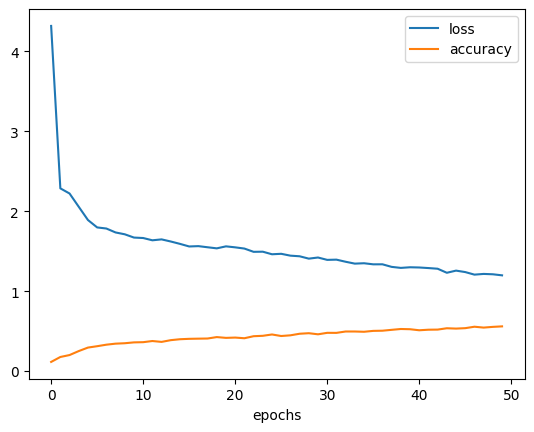

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [ ]:
model1.evaluate(X_test, y_test)

59/59 [==============================] - 6s 82ms/step - loss: 1.4734 - accuracy: 0.4670


[1.473405122756958, 0.46695324778556824]

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model2 = Sequential()
model2.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling1D(pool_size=(8)))
model2.add(layers.Dropout(0.2))
model2.add(layers.Conv1D(128, 5,padding='same'))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling1D(pool_size=(4)))
model2.add(layers.Dropout(0.1))
model2.add(layers.Conv1D(64, 5,padding='same'))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling1D(pool_size=(4)))
model2.add(layers.Dropout(0.1))
model2.add(layers.Flatten())
model2.add(layers.Dense(128))
model2.add(layers.Dense(64))
model2.add(layers.Dense(32))
model2.add(layers.Dense(12))
model2.add(layers.Activation('softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 431, 256)          25856     
                                                                 
 activation_3 (Activation)   (None, 431, 256)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 53, 256)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 53, 256)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 53, 128)           163968    
                                                                 
 activation_4 (Activation)   (None, 53, 128)           0         
                                                      

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model2 = Sequential()
model2.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(431,20)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling1D(pool_size=(8)))
model2.add(layers.Dropout(0.2))
model2.add(layers.Conv1D(128, 5,padding='same'))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling1D(pool_size=(4)))
model2.add(layers.Dropout(0.1))
model2.add(layers.Conv1D(64, 5,padding='same'))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling1D(pool_size=(4)))
model2.add(layers.Dropout(0.1))
model2.add(layers.Flatten())
model2.add(layers.Dense(128))
model2.add(layers.Dense(64))
model2.add(layers.Dense(32))
model2.add(layers.Dense(12))
model2.add(layers.Activation('softmax'))

model2.compile(optimizer=tf.keras.optimizers.experimental.Adam(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model2.fit(X_train, y_train,batch_size=10, epochs=200)


Epoch 1/200
559/559 [==============================] - 45s 74ms/step - loss: 3.9341 - accuracy: 0.1365
Epoch 2/200
559/559 [==============================] - 30s 53ms/step - loss: 2.2602 - accuracy: 0.1804
Epoch 3/200
559/559 [==============================] - 33s 58ms/step - loss: 2.1092 - accuracy: 0.2423
Epoch 4/200
559/559 [==============================] - 30s 53ms/step - loss: 1.9165 - accuracy: 0.2863
Epoch 5/200
559/559 [==============================] - 33s 59ms/step - loss: 1.8097 - accuracy: 0.3111
Epoch 6/200
559/559 [==============================] - 32s 58ms/step - loss: 1.7533 - accuracy: 0.3370
Epoch 7/200
559/559 [==============================] - 29s 52ms/step - loss: 1.7047 - accuracy: 0.3435
Epoch 8/200
559/559 [==============================] - 33s 60ms/step - loss: 1.6743 - accuracy: 0.3607
Epoch 9/200
559/559 [==============================] - 30s 54ms/step - loss: 1.6340 - accuracy: 0.3774
Epoch 10/200
559/559 [==============================] - 31s 56ms/step - l

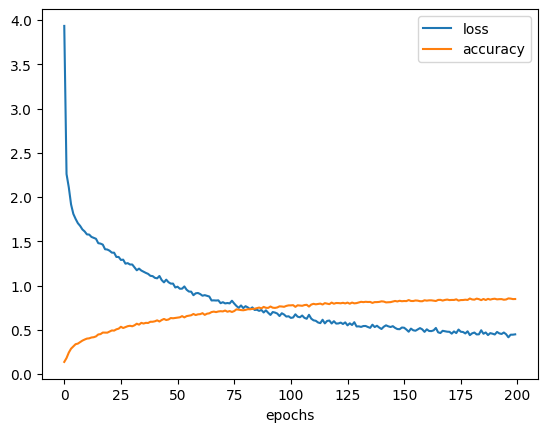

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.xlabel("epochs")
plt.show()

In [ ]:
model2.evaluate(X_test, y_test)

59/59 [==============================] - 2s 33ms/step - loss: 1.8347 - accuracy: 0.4954


[1.8346741199493408, 0.4954325556755066]